In [1]:
import scanpy as sc
import pandas as pd
import statistics
import sys
import getopt
import os
import matplotlib.pyplot as mp
import anndata as ad
import time

In [2]:
sc.settings.figdir = "../results/figures/"
print(sc.__version__)

1.10.1


In [3]:
adata = ad.read_h5ad("h5s/ASAP_adata_umap_integration.h5")

In [4]:
cell_cycle_genes = [x.strip() for x in open('./cellcycle.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

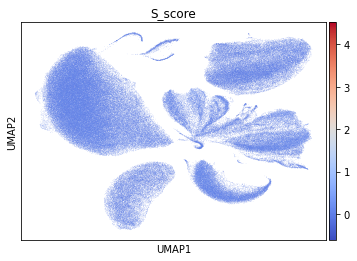

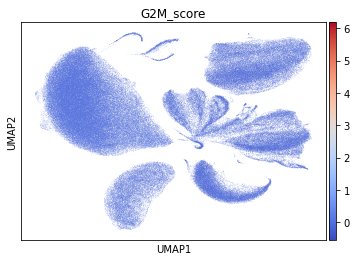

In [5]:
sc.pl.umap(adata, color='S_score', cmap="coolwarm")
sc.pl.umap(adata, color='G2M_score', cmap="coolwarm")

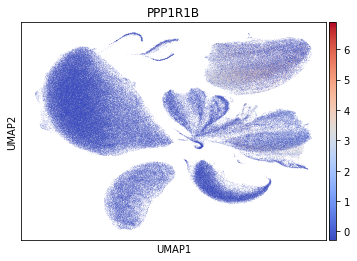

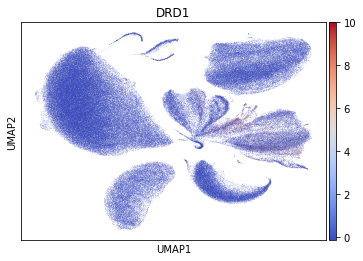

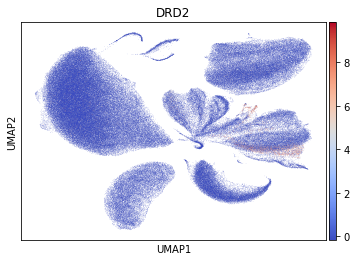

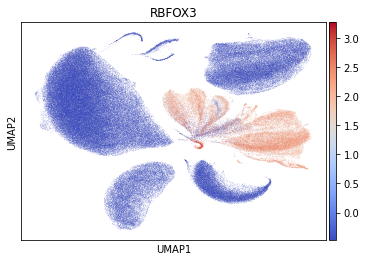

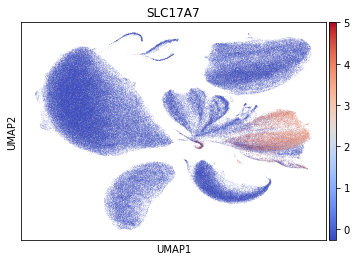

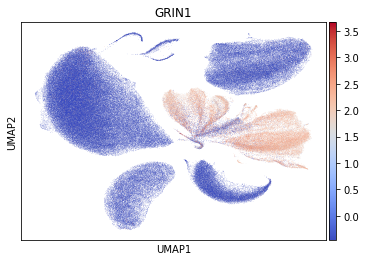

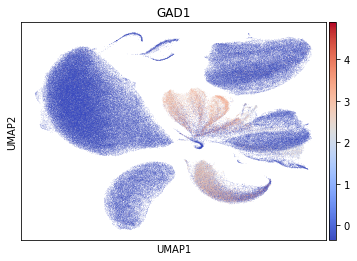

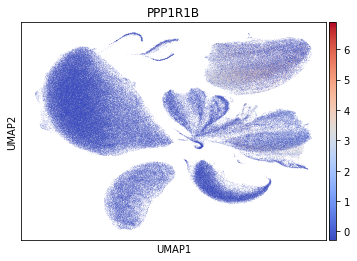

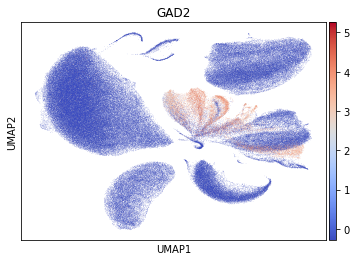

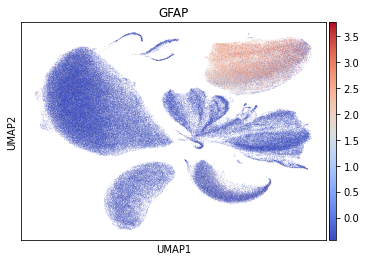

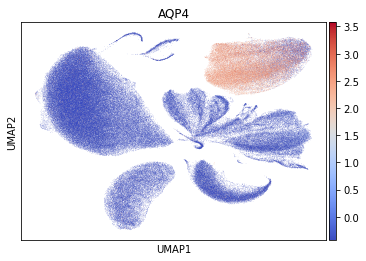

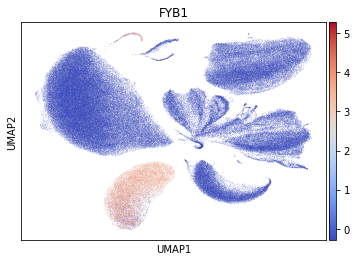

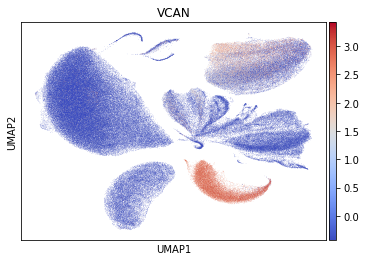

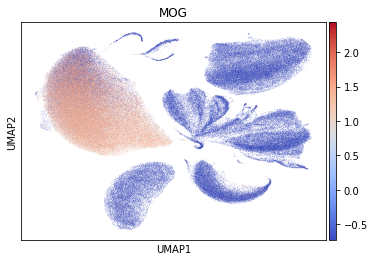

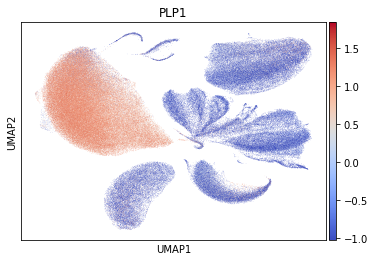

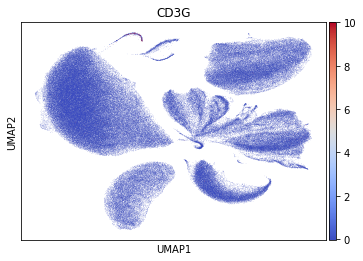

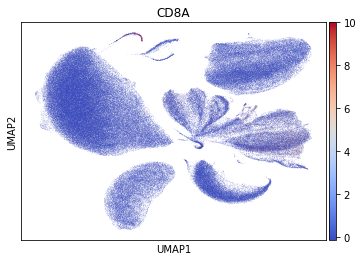

In [5]:
sc.pl.umap(adata, color = 'PPP1R1B', save = "_PPP1R1B", cmap="coolwarm")
sc.pl.umap(adata, color = 'DRD1', save = "_DRD1", cmap="coolwarm", vmax=5)
sc.pl.umap(adata, color = 'DRD2', save = "_DRD2", cmap="coolwarm", vmax=5)
sc.pl.umap(adata, color = 'RBFOX3', save = "_RBFOX3", cmap="coolwarm")
sc.pl.umap(adata, color = 'SLC17A7', save = "_SLC17A7", cmap="coolwarm", vmax=5)
sc.pl.umap(adata, color = 'GRIN1', save = "_GRIN1", cmap="coolwarm")
sc.pl.umap(adata, color = 'GAD1', save = "_GAD1", cmap="coolwarm")
sc.pl.umap(adata, color = 'PPP1R1B', save = "_PPP1R1B", cmap="coolwarm")
sc.pl.umap(adata, color = 'GAD2', save = "_GAD2", cmap="coolwarm")
sc.pl.umap(adata, color = 'GFAP', save = "_GFAP", cmap="coolwarm")
sc.pl.umap(adata, color = 'AQP4', save = "_AQP4", cmap="coolwarm")
sc.pl.umap(adata, color = 'FYB1', save = "_FYB1", cmap="coolwarm")
sc.pl.umap(adata, color = 'VCAN', save = "_VCAN", cmap="coolwarm")
sc.pl.umap(adata, color = 'MOG', save = "_MOG", cmap="coolwarm")
sc.pl.umap(adata, color = 'PLP1', save = "_PLP1", cmap="coolwarm")
sc.pl.umap(adata, color = 'CD3G', save = "_CD3", cmap="coolwarm")
sc.pl.umap(adata, color = 'CD8A', save = "_CD8", cmap="coolwarm")


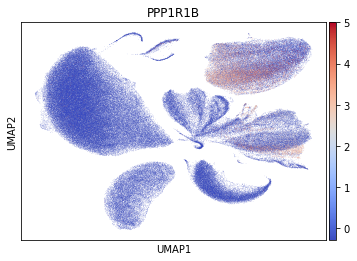

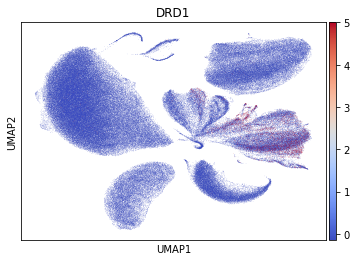

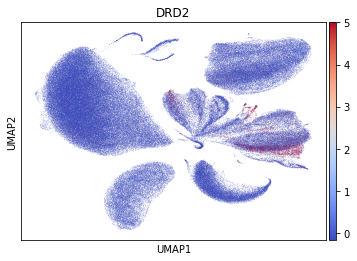

In [7]:
sc.pl.umap(adata, color = 'PPP1R1B', save = "_PPP1R1B", cmap="coolwarm", vmax=5)
sc.pl.umap(adata, color = 'DRD1', save = "_DRD1", cmap="coolwarm", vmax=5)
sc.pl.umap(adata, color = 'DRD2', save = "_DRD2", cmap="coolwarm", vmax=5)

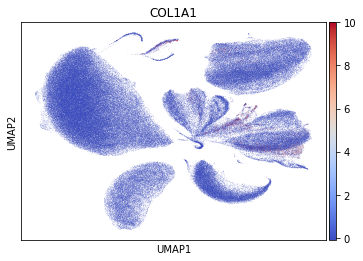

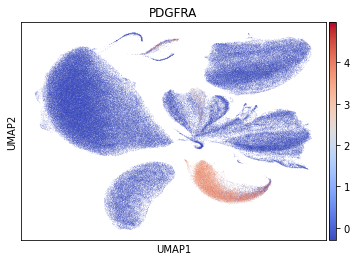

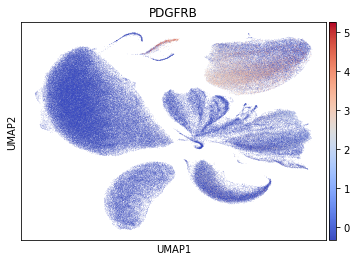

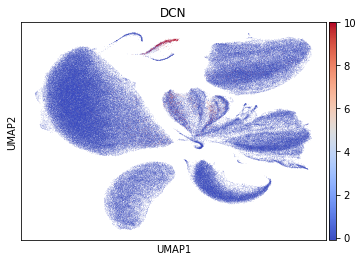

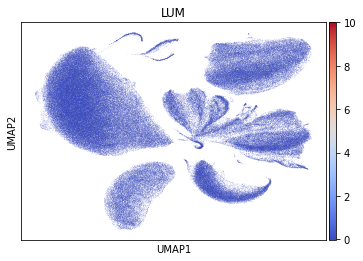

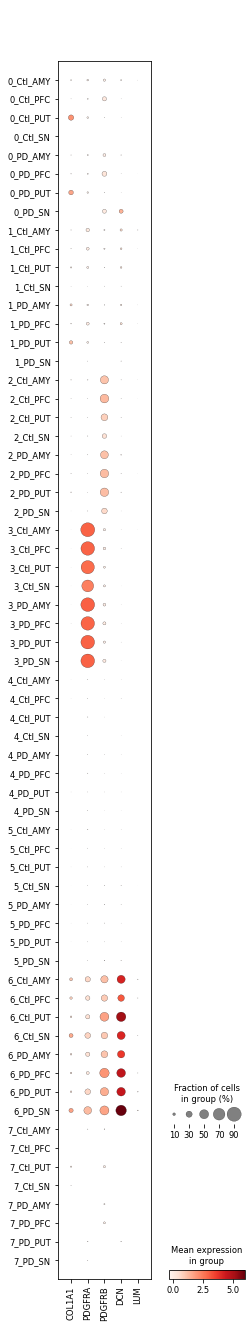

In [7]:
sc.pl.umap(adata, color = 'COL1A1', save = "_COL1A1", cmap="coolwarm")
sc.pl.umap(adata, color = 'PDGFRA', save = "_PDGFRA", cmap="coolwarm")
sc.pl.umap(adata, color = 'PDGFRB', save = "_PDGFRB", cmap="coolwarm")
sc.pl.umap(adata, color = 'DCN', save = "_DCN", cmap="coolwarm")
sc.pl.umap(adata, color = 'LUM', save = "_LUM", cmap="coolwarm")

sc.pl.dotplot(adata, groupby=["leiden", "dx", "region"], var_names = ["COL1A1", "PDGFRA", "PDGFRB", "DCN", "LUM"], save = "_VLCM_region_dx.pdf")

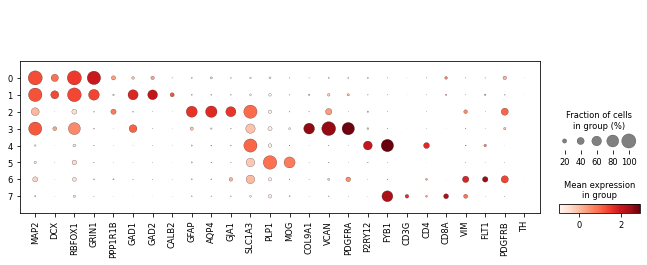

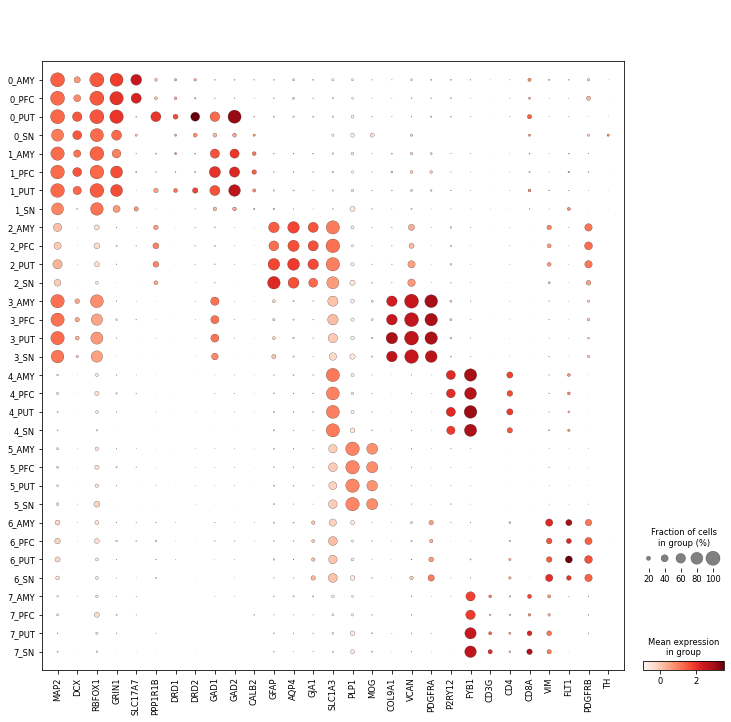

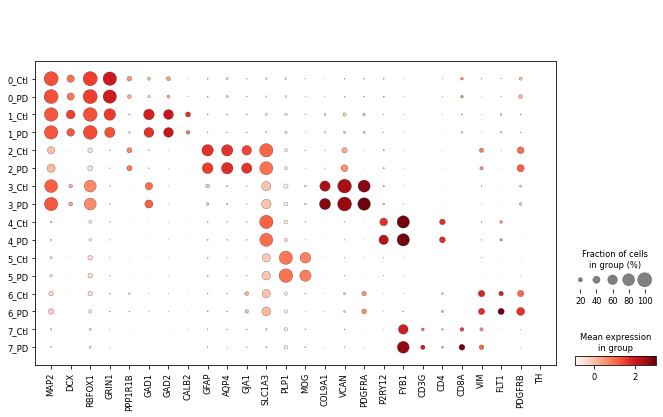

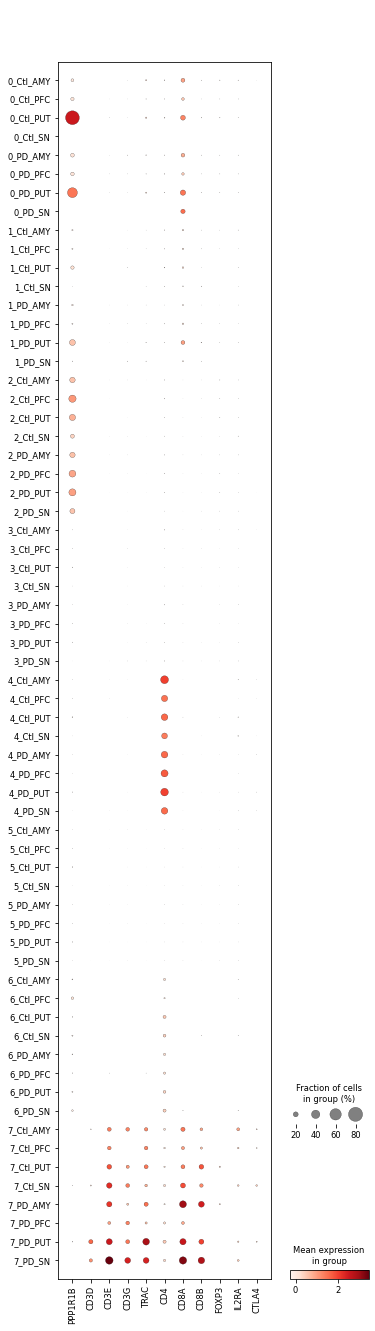

In [9]:
sc.pl.dotplot(adata, groupby="leiden", var_names = ["MAP2", "DCX", "RBFOX1", "GRIN1", "PPP1R1B", "GAD1", "GAD2", "CALB2", "GFAP", "AQP4", "GJA1", "SLC1A3", "PLP1", "MOG", "COL9A1", "VCAN", "PDGFRA", "P2RY12", "FYB1", "CD3G", "CD4", "CD8A",  "VIM", "FLT1", "PDGFRB", "TH"], save = "_markers_clusters.pdf")
sc.pl.dotplot(adata, groupby=["leiden", "region"], var_names = ["MAP2", "DCX", "RBFOX1", "GRIN1", "SLC17A7", "PPP1R1B","DRD1", "DRD2", "GAD1", "GAD2", "CALB2", "GFAP", "AQP4", "GJA1", "SLC1A3", "PLP1", "MOG", "COL9A1", "VCAN", "PDGFRA", "P2RY12", "FYB1", "CD3G", "CD4", "CD8A",  "VIM", "FLT1", "PDGFRB", "TH"], save = "_markers_clusters_region.pdf")
sc.pl.dotplot(adata, groupby=["leiden", "dx"], var_names = ["MAP2", "DCX", "RBFOX1", "GRIN1", "PPP1R1B", "GAD1", "GAD2", "CALB2", "GFAP", "AQP4", "GJA1", "SLC1A3", "PLP1", "MOG", "COL9A1", "VCAN", "PDGFRA", "P2RY12", "FYB1", "CD3G", "CD4", "CD8A",  "VIM", "FLT1", "PDGFRB", "TH"], save = "_markers_clusters_dx.pdf")
sc.pl.dotplot(adata, groupby=["leiden", "dx", "region"], var_names = ["PPP1R1B", "CD3D", "CD3E", "CD3G", "TRAC", "CD4", "CD8A", "CD8B", "FOXP3", "IL2RA", "CTLA4"], save = "_Tcells_tregs_region_dx.pdf")

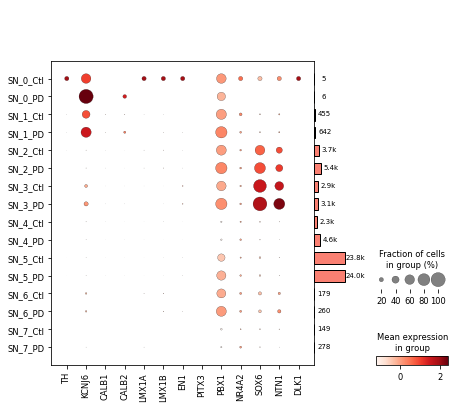

In [25]:
dp = sc.pl.dotplot(adata[adata.obs["region"] == "SN"], return_fig = True, groupby=["region", "leiden", "dx"], var_names = ["TH", "KCNJ6", "CALB1", "CALB2", "LMX1A", "LMX1B", "EN1", "PITX3", "PBX1", "NR4A2", "SOX6", "NTN1", "DLK1" ])
dp.add_totals().savefig(filename = "dotplot__DA_neuron_markers.pdf")

To be revised -->

In [8]:
celltype = {"0" : "0_ExcNeurons",
            "1" : "1_InhNeurons",
            "2" : "2_Astrocytes",
            "3" : "3_OPC",
            "4" : "4_Microglia",
            "5" : "5_Oligodendrocytes",
            "6" : "6_Endothelial",
           "7" : "7_Tcells"}

adata.obs["cell_type"] = [celltype[str(i)] for i in adata.obs["leiden"]]

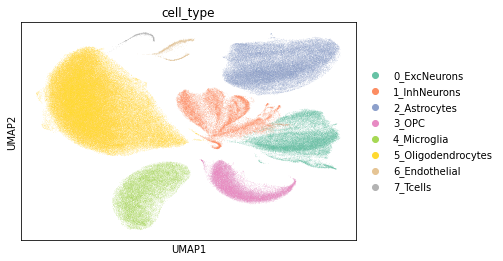

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


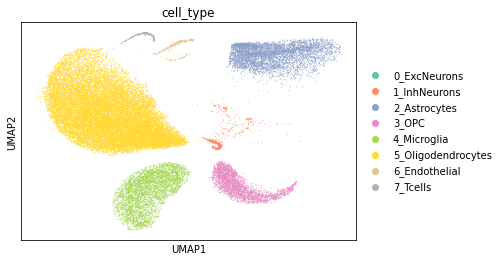

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


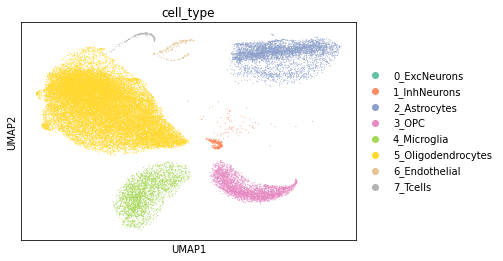

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


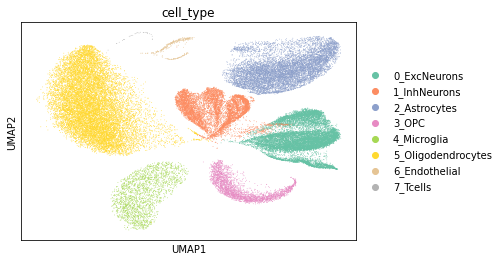

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


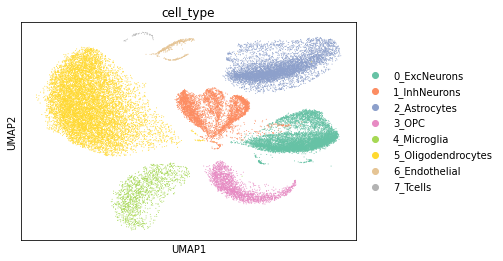

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


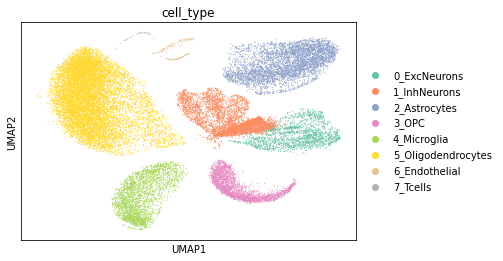

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


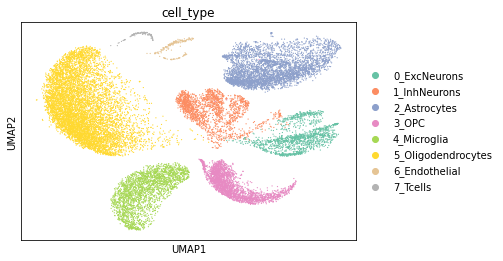

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


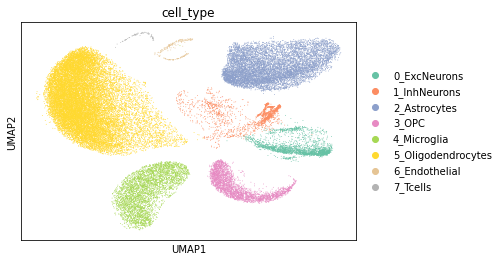

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


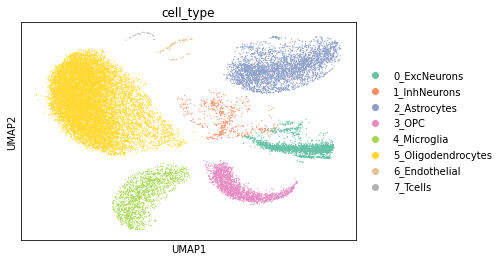

In [9]:
sc.pl.umap(adata, color = 'cell_type', save = "_celltypes.pdf", palette = "Set2")

sc.pl.umap(adata[adata.obs["region"].isin(["SN"]) & adata.obs["dx"].isin(["PD"])], color = 'cell_type', save = "_SN_PD.pdf", palette = "Set2")
sc.pl.umap(adata[adata.obs["region"].isin(["SN"]) & adata.obs["dx"].isin(["Ctl"])], color = 'cell_type', save = "_SN_Ctl.pdf", palette = "Set2")

sc.pl.umap(adata[adata.obs["region"].isin(["PFC"]) & adata.obs["dx"].isin(["PD"])], color = 'cell_type', save = "_PFC_PD.pdf", palette = "Set2")
sc.pl.umap(adata[adata.obs["region"].isin(["PFC"]) & adata.obs["dx"].isin(["Ctl"])], color = 'cell_type', save = "_PFC_Ctl.pdf", palette = "Set2")

sc.pl.umap(adata[adata.obs["region"].isin(["AMY"]) & adata.obs["dx"].isin(["PD"])], color = 'cell_type', save = "_AMY_PD.pdf", palette = "Set2")
sc.pl.umap(adata[adata.obs["region"].isin(["AMY"]) & adata.obs["dx"].isin(["Ctl"])], color = 'cell_type', save = "_AMY_Ctl.pdf", palette = "Set2")

sc.pl.umap(adata[adata.obs["region"].isin(["PUT"]) & adata.obs["dx"].isin(["PD"])], color = 'cell_type', save = "_PUT_PD.pdf", palette = "Set2")
sc.pl.umap(adata[adata.obs["region"].isin(["PUT"]) & adata.obs["dx"].isin(["Ctl"])], color = 'cell_type', save = "_PUT_Ctl.pdf", palette = "Set2")

In [10]:
df = sc.get.obs_df(adata, ['leiden', 'cell_type', 'sample_name','patient','region','sex','age', 'pmi', 'braak', 'batch', 'dx','n_genes_by_counts', "total_counts", "pct_counts_mt"])
df.to_csv('../results/tables/ASAP_QC_celltypes.csv')

adata.write_h5ad("ASAP_adata_umap_integration.h5")

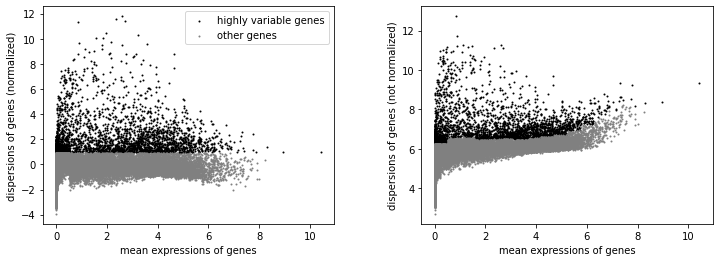

In [11]:
#adata_regressed = sc.pp.regress_out(adata, keys = ["batch", "sex", "age"], layer = "regressed_counts", copy=True)
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = ad.read_h5ad("h5s/ASAP_adata_umap_integration.h5")
adata_list = {"SN" :  adata[adata.obs["region"].isin(["SN"])], "PUT" : adata[adata.obs["region"].isin(["PUT"])], "PFC" : adata[adata.obs["region"].isin(["PFC"])], "AMY" : adata[adata.obs["region"].isin(["AMY"])]}
chrX = pd.read_csv("/scale/gr01/shared/jjakobsson/processed/ASAP_snRNA_spatial_invitro/data/tables/chrX_genes.txt", header=None)
chrY = pd.read_csv("/scale/gr01/shared/jjakobsson/processed/ASAP_snRNA_spatial_invitro/data/tables/chrY_genes.txt", header=None)
sex_genes = [i for i in adata.var_names.tolist() if i in chrX[0].tolist() or i in chrY[0].tolist()]
keep_genes = adata.var_names.tolist()
keep_genes = [i for i in keep_genes if i not in sex_genes]
len(keep_genes)

In [9]:
adata_dict_leiden_dea = {}
for r in ["SN", "PUT", "PFC", "AMY"]:
    adata_dict_leiden_dea[r] = {}
    print(r)
    adata_list[r] = adata_list[r][:,[i in keep_genes for i in adata_list[r].var.index.tolist()]]
    print("XIST" in adata_list[r].var_names.tolist())
    sc.tl.rank_genes_groups(adata_list[r], groupby = 'leiden', method="wilcoxon", key_added = "wilcoxon")
    for i in adata_list[r].obs["leiden"].astype(str).unique():
        adata_dict_leiden_dea[r][i] = sc.get.rank_genes_groups_df(adata_list[r], group = i, key="wilcoxon")
        adata_dict_leiden_dea[r][i].index = adata_dict_leiden_dea[r][i].names
        print(i)

SN
False


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_

2
5
4
3
6
1
7
0
PUT
False


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_

0
2
1
3
4
5
6
7
PFC
False


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_

2
1
0
4
5
3
6
7
AMY
False


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


5
3
2
7
1
4
6
0


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

In [6]:
for r in ["SN", "PUT", "PFC", "AMY"]:
    print(r)
    adata_tmp = adata_list[r]
    for i in adata_tmp.obs["leiden"].astype(str).unique():
        file = "../results/tables/asap_dea_psc1_" + r + "_" + i + ".csv" # pseudocount of 1
        adata_dict_leiden_dea[r][i].to_csv(path_or_buf = file, index = False)

SN
PUT
PFC
AMY


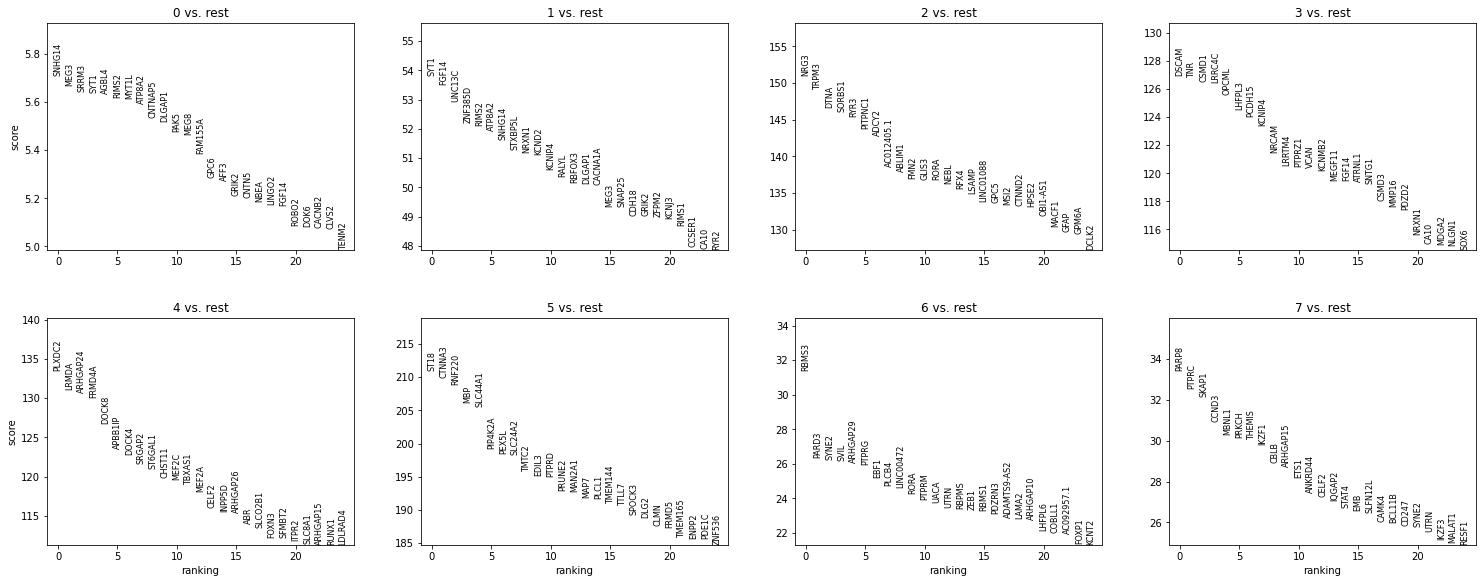

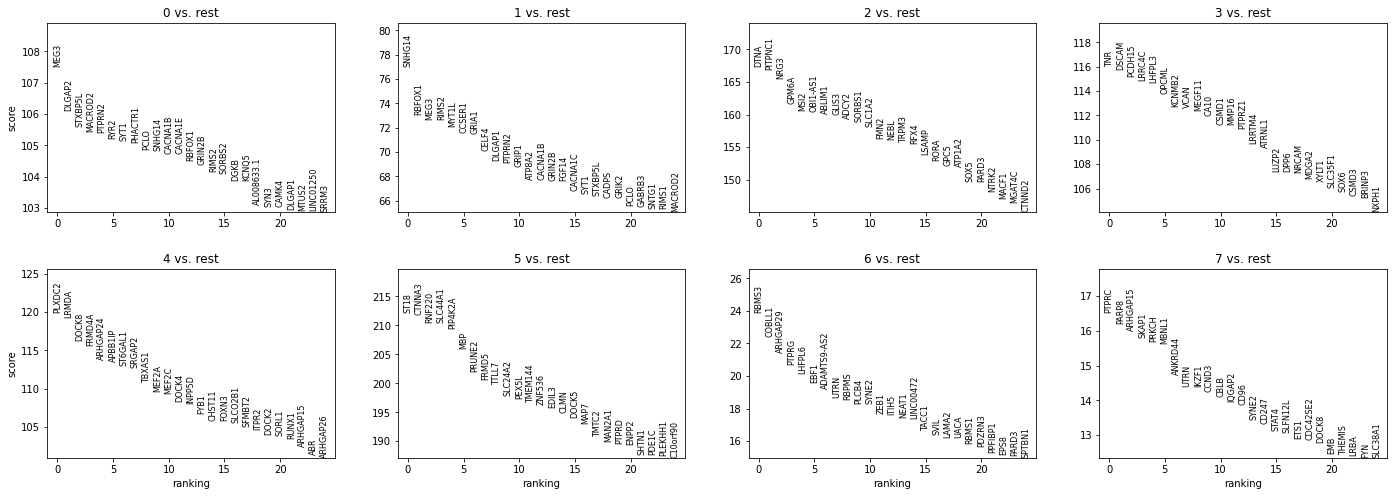

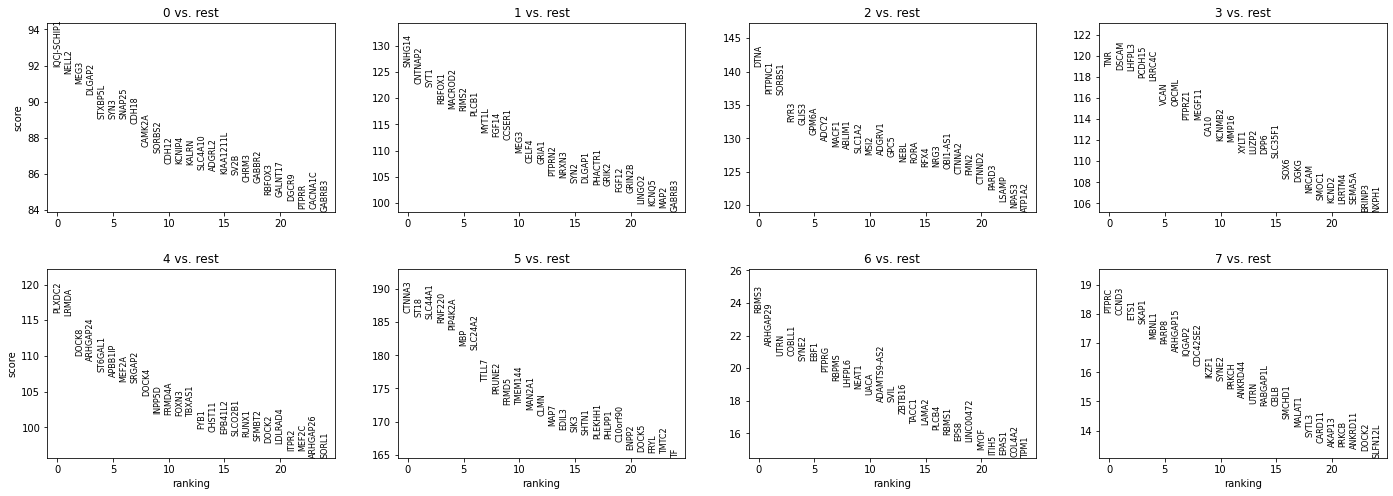

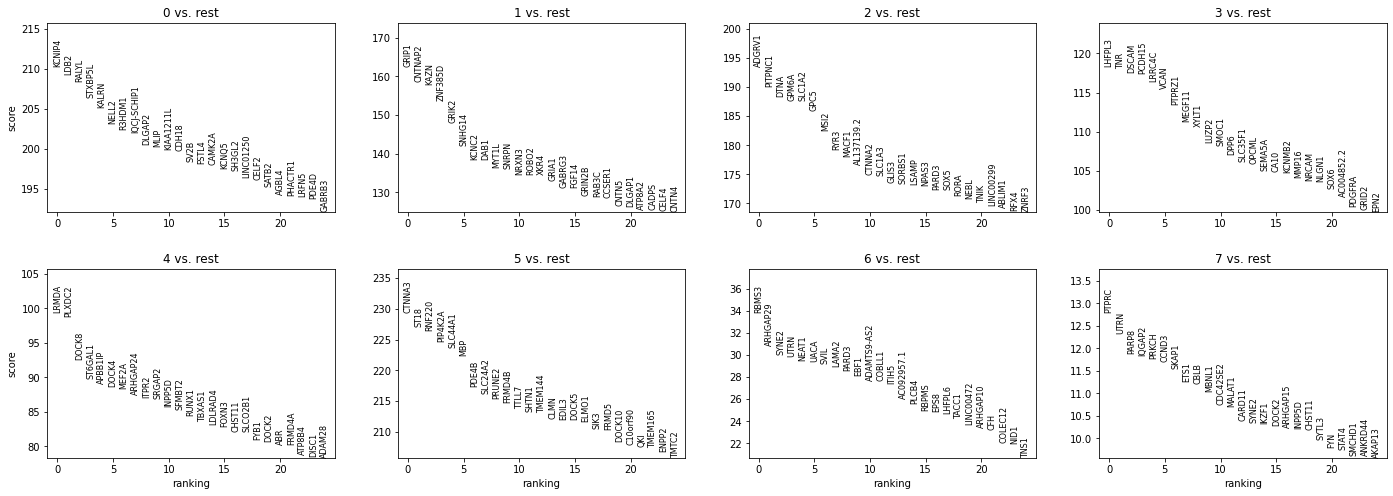

In [7]:
sc.pl.rank_genes_groups(adata_list["SN"], n_genes=25, sharey=False, key="wilcoxon", save = "_SN.pdf")
sc.pl.rank_genes_groups(adata_list["PUT"], n_genes=25, sharey=False, key="wilcoxon", save = "_PUT.pdf")
sc.pl.rank_genes_groups(adata_list["AMY"], n_genes=25, sharey=False, key="wilcoxon", save = "_AMY.pdf")
sc.pl.rank_genes_groups(adata_list["PFC"], n_genes=25, sharey=False, key="wilcoxon", save = "_PFC.pdf")

In [8]:
adata_list["SN"].write_h5ad("ASAP_adata_list_celltypes_DEA_SN.h5")
adata_list["AMY"].write_h5ad("ASAP_adata_list_celltypes_DEA_AMY.h5")
adata_list["PFC"].write_h5ad("ASAP_adata_list_celltypes_DEA_PFC.h5")
adata_list["PUT"].write_h5ad("ASAP_adata_list_celltypes_DEA_PUT.h5")


In [4]:
adata_list = {}

adata_list["SN"] = ad.read_h5ad("h5s/ASAP_adata_list_celltypes_DEA_SN.h5")
adata_list["AMY"] = ad.read_h5ad("h5s/ASAP_adata_list_celltypes_DEA_AMY.h5")
adata_list["PFC"] = ad.read_h5ad("h5s/ASAP_adata_list_celltypes_DEA_PFC.h5")
adata_list["PUT"] = ad.read_h5ad("h5s/ASAP_adata_list_celltypes_DEA_PUT.h5")


In [10]:
import re
for region in ["SN", "PUT", "AMY", "PFC"]:
    for cluster in adata_list[region].obs.leiden.unique().tolist():
            for sample in adata_list[region].obs.sample_name.unique().tolist():
                dir_name = os.path.join("../barcodes_vs2/", region)
                if not os.path.exists(dir_name):
                    os.makedirs(dir_name)
                file_name = os.path.join(dir_name, sample + "_merged.clusters_" + cluster + ".tsv")
                barcodes = adata_list[region][adata_list[region].obs["region"].isin([region]) & adata_list[region].obs["leiden"].isin([cluster]) & adata_list[region].obs["sample_name"].isin([sample])].obs_names.tolist()
                barcodes_dups = [i[:-2] for i in barcodes if bool(re.search(r'\-\d+\-\d+$', i))]
                barcodes_nodups = [i for i in barcodes if not bool(re.search(r'\-\d+\-\d+$', i))]
                barcodes = barcodes_dups + barcodes_nodups
                if len(barcodes) > 0:
                    with open(file_name, "w") as fout:
                        for cell in barcodes:
                            fout.write("%s\n" % cell)

In [34]:
with open("samples_paired_xenium.tab", "r") as fin:
    xenium_snrnaseq = fin.readlines()

xenium_snrnaseq = [i.strip() for i in xenium_snrnaseq]

#adata = ad.read_h5ad("h5s/ASAP_adata_umap_integration.h5")
adata_xenium_samples = adata[adata.obs["sample_name"].isin(xenium_snrnaseq)]
adata_xenium_samples.write_h5ad("h5s/ASAP_adata_xenium_samples_umap_integration.h5")

In [37]:
adata_xenium_samples
#print(len(xenium_snrnaseq))

View of AnnData object with n_obs × n_vars = 49861 × 33056
    obs: 'sample_name', 'patient', 'cohort', 'region', 'sex', 'age', 'pmi', 'braak', 'batch', 'dx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'n_genes', 'batch_num', 'leiden', 'S_score', 'G2M_score', 'phase', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'dx_colors', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'patient_colors', 'pca', 'region_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'scaled'
    obsp: 'connectivities', 'distances'

In [8]:
#cell_meta.to_csv('../results/tables/counts_cellMeta_integrated_umap.csv',index=None)


adata.write_h5ad("../results/tables/norm_counts.csv.gz", compression="gzip")

In [ ]:
cell_meta=adata.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = adata.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = adata.obsm['X_umap'][:,1]

gene_meta=adata.var.copy()
gene_meta['GeneName']=gene_meta.index
cell_meta.to_csv('../results/tables/counts_cellMeta_integrated_umap.csv',index=None)
gene_meta.to_csv('../results/tables/counts_geneMeta_integrated_umap.csv',index=None)


In [8]:
cell_meta=adata.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = adata.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = adata.obsm['X_umap'][:,1]
cell_meta['S_score'] = adata.obs['S_score']
cell_meta['G2M_score'] = adata.obs['G2M_score']

cell_meta.to_csv('../results/tables/counts_cellcycle_cellMeta_integrated_umap.csv',index=None)

/tmp/ipykernel_1408279/2212795977.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microglia.obs["dx_region"] = microglia.obs[['region','dx']].apply(lambda x : '{}_{}'.format(x[0],x[1]), axis=1)
/tmp/ipykernel_1408279/2212795977.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  microglia.obs["dx_region"] = microglia.obs[['region','dx']].apply(lambda x : '{}_{}'.format(x[0],x[1]), axis=1)


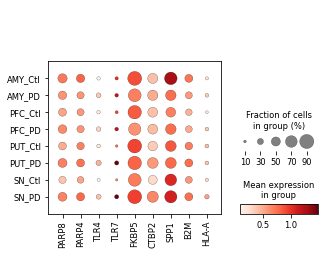

In [5]:
adata = ad.read_h5ad("h5s/ASAP_adata_umap_integration.h5")
microglia = adata[adata.obs.cell_type == "4_Microglia"]
#microglia.obs["dx"]  + microglia.obs["region"].as_df()
microglia.obs["dx_region"] = microglia.obs[['region','dx']].apply(lambda x : '{}_{}'.format(x[0],x[1]), axis=1)

sc.pl.dotplot(microglia, groupby=["region", "dx"], var_names = ["PARP8","PARP4", "TLR4", "TLR7",  "FKBP5", "CTBP2", "SPP1", "B2M", "HLA-A"])

In [28]:
tlrs = [i for i in microglia.var_names.tolist() if i.startswith("TLR")]
parps = [i for i in microglia.var_names.tolist() if i.startswith("PARP")]
hlas = [i for i in microglia.var_names.tolist() if i.startswith("HLA")]
upreg_sn_pseudobulk = pd.read_csv("/scale/gr01/shared/jjakobsson/processed/ASAP_snRNA_spatial_invitro/data/tables/upreg_sn_genes_pseudobulk.tab", header=None)

upreg_sn_pseudobulk = upreg_sn_pseudobulk[0].tolist()
genes_to_check = ["FKBP5", "CTBP2", "APOE", "SPP1", "B2M", "AIF1", "CD68", "CD206", "CD45"] + tlrs + parps + hlas + upreg_sn_pseudobulk

genes_to_check

genes_to_check = [i for i in genes_to_check if i in microglia.var_names.tolist()]
"CD68" in genes_to_check

True

In [29]:
sc.get.obs_df(microglia, genes_to_check).to_csv("../results/tables/microglia_genes_counts.csv")

In [48]:
cell_meta=microglia.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = microglia.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = microglia.obsm['X_umap'][:,1]
microglia.get(["TLR7"])
gene_meta=adata.var.copy()
gene_meta['GeneName']=gene_meta.index
cell_meta.to_csv('../results/tables/counts_cellMeta_integrated_umap.csv',index=None)
gene_meta.to_csv('../results/tables/counts_geneMeta_integrated_umap.csv',index=None)


AnnData object with n_obs × n_vars = 21443 × 33056
    obs: 'sample_name', 'patient', 'cohort', 'region', 'sex', 'age', 'pmi', 'braak', 'batch', 'dx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'n_genes', 'batch_num', 'leiden', 'S_score', 'G2M_score', 'phase', 'cell_type', 'dx_region'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'dx_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'patient_colors', 'pca', 'region_colors', 'umap', 'dx_region_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'scaled'
    obsp: 'connectivities', 'distances'

In [4]:
adata = ad.read_h5ad("h5s/ASAP_adata_umap_integration.h5")

In [12]:
sc.get.obs_df(adata, ["total_counts", "sample_name", "leiden"]).to_csv("../results/tables/total_counts_per_sample.csv")

In [13]:
sc.get.obs_df(adata, ["total_counts", "sample_name", "leiden"])

total_counts                  sample_name leiden
AAACCCAAGAGGATCC-1       11452.0  AA71_ASAP70_PD_NP18-304_PUT      0
AAACCCAAGGTAAGTT-1       19718.0  AA71_ASAP70_PD_NP18-304_PUT      2
AAACCCACAGTCCGTG-1        8151.0  AA71_ASAP70_PD_NP18-304_PUT      1
AAACGAAAGCGTATGG-1       18006.0  AA71_ASAP70_PD_NP18-304_PUT      0
AAACGAACAGAAGCTG-1        3546.0  AA71_ASAP70_PD_NP18-304_PUT      2
...                          ...                          ...    ...
TTTGATCGTTGCAAGG-1        2675.0    MJ_ASAP6_ctrl_NP16-164_SN      5
TTTGGTTAGGTAATCA-1        1565.0    MJ_ASAP6_ctrl_NP16-164_SN      2
TTTGGTTCAAATAGCA-1        8331.0    MJ_ASAP6_ctrl_NP16-164_SN      2
TTTGGTTGTCGAATGG-1        1968.0    MJ_ASAP6_ctrl_NP16-164_SN      4
TTTGTTGCAGTCGGAA-1        1047.0    MJ_ASAP6_ctrl_NP16-164_SN      4

[271700 rows x 3 columns]